C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: UserWarning: Glyph 32456 (\N{CJK UNIFIED IDEOGRAPH-7EC8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_61768\3806066913.py:27: Use

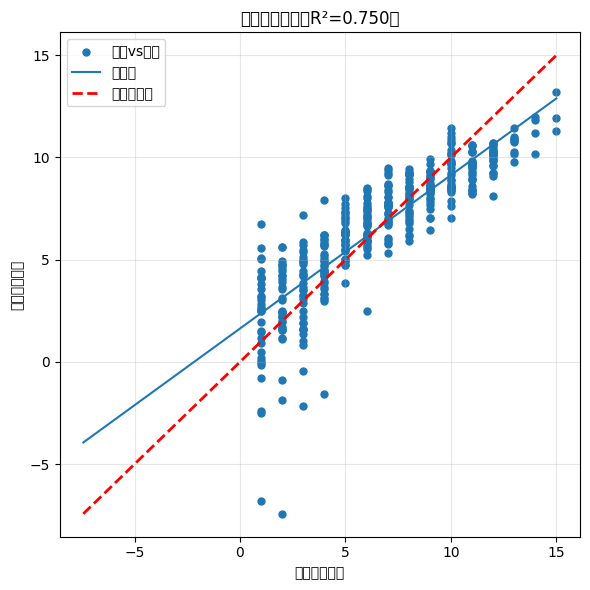

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("q3_actual_vs_predicted.csv")

x = df["actual"].to_numpy()
y = df["predicted"].to_numpy()
R2 = df["R2"].iloc[0]

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=25, label="实际vs预测")

k, b = np.polyfit(x, y, 1)
xx = np.linspace(min(x.min(), y.min()), max(x.max(), y.max()), 200)
plt.plot(xx, k*xx + b, label="趋势线")

plt.plot(xx, xx, "r--", linewidth=2, label="理想拟合线")

plt.title(f"模型拟合效果（R²={R2:.3f}）")
plt.xlabel("实际最终成绩")
plt.ylabel("预测最终成绩")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(CSV_PATH)

x = df["actual"].to_numpy()
y = df["predicted"].to_numpy()

if "R2" in df.columns:
    R2 = float(df["R2"].iloc[0])
else:
    k, b = np.polyfit(x, y, 1)
    yhat = k * x + b
    ss_res = np.sum((y - yhat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - ss_res / ss_tot

sns.set_theme(style="ticks")
plt.rcParams["axes.unicode_minus"] = False

g = sns.jointplot(
    x=x, y=y,
    kind="hex",
    height=7,
    space=0.12
)

ax = g.ax_joint

lo = np.floor(min(x.min(), y.min()))
hi = np.ceil(max(x.max(), y.max()))
xx = np.linspace(lo, hi, 200)

ax.plot(xx, xx, "r--", lw=2, label="理想拟合线")

k, b = np.polyfit(x, y, 1)
ax.plot(xx, k * xx + b, lw=2, color="black", label="趋势线")

ax.set_xlabel("实际最终成绩")
ax.set_ylabel("预测最终成绩")
ax.set_title(f"模型拟合效果（R²={R2:.3f}）", pad=12)

ax.legend(loc="upper left", frameon=True)

ax.grid(True, alpha=0.25)
sns.despine(ax=ax)


plt.tight_layout()
plt.show()

 g.fig.savefig("hexbin_actual_vs_predicted.png", dpi=300, bbox_inches="tight")


IndentationError: unexpected indent (3780615247.py, line 74)

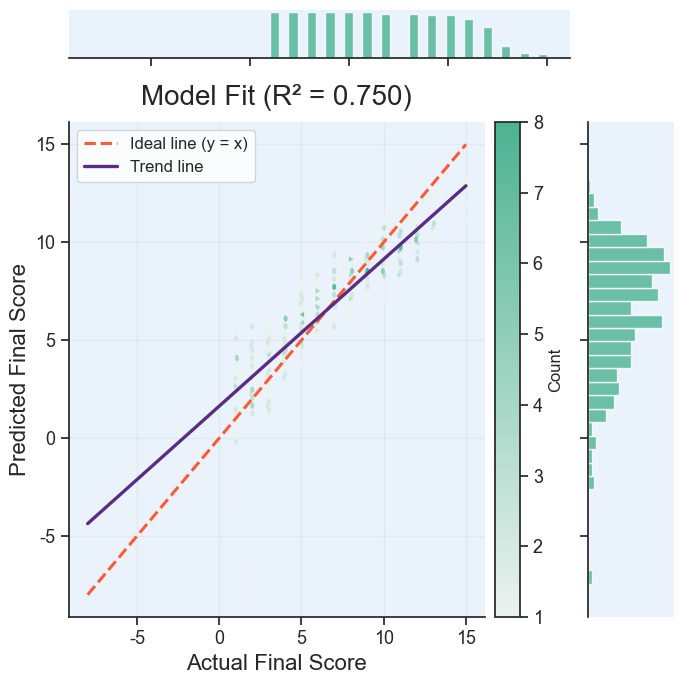

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CSV_PATH = "q3_actual_vs_predicted.csv"

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.unicode_minus"] = False

AX_BG = "#EAF2FB"

FS_TITLE = 20
FS_LABEL = 16
FS_TICK  = 13
FS_LEG   = 12
FS_CBAR  = 12

HEX_GRIDSIZE = 90

IDEAL_LS = "--"
TREND_LS = "-"

MARGINAL_COLOR = "#4CB391"

sns.set_theme(style="ticks")

df = pd.read_csv(CSV_PATH)
x = df["actual"].to_numpy()
y = df["predicted"].to_numpy()

R2 = float(df["R2"].iloc[0]) if "R2" in df.columns else None

g = sns.JointGrid(x=x, y=y, height=7, space=0.12)

hb = g.ax_joint.hexbin(
    x, y,
    gridsize=HEX_GRIDSIZE,
    cmap=sns.light_palette(MARGINAL_COLOR, as_cmap=True),
    mincnt=1
)

g.ax_marg_x.hist(x, bins=30, color=MARGINAL_COLOR, alpha=0.80)
g.ax_marg_y.hist(y, bins=30, orientation="horizontal", color=MARGINAL_COLOR, alpha=0.80)

g.fig.set_facecolor("white")
g.ax_joint.set_facecolor(AX_BG)
g.ax_marg_x.set_facecolor(AX_BG)
g.ax_marg_y.set_facecolor(AX_BG)

lo = np.floor(min(x.min(), y.min()))
hi = np.ceil(max(x.max(), y.max()))
xx = np.linspace(lo, hi, 200)

g.ax_joint.plot(xx, xx, linestyle=IDEAL_LS, lw=2.2, color=IDEAL_COLOR, label="Ideal line (y = x)")

k, b = np.polyfit(x, y, 1)
g.ax_joint.plot(xx, k * xx + b, linestyle=TREND_LS, lw=2.4, color=TREND_COLOR, label="Trend line")

g.ax_joint.set_xlabel("Actual Final Score", fontsize=FS_LABEL)
g.ax_joint.set_ylabel("Predicted Final Score", fontsize=FS_LABEL)

if R2 is not None:
    g.ax_joint.set_title(f"Model Fit (R\u00b2 = {R2:.3f})", fontsize=FS_TITLE, pad=12)
else:
    g.ax_joint.set_title("Model Fit", fontsize=FS_TITLE, pad=12)

g.ax_joint.tick_params(labelsize=FS_TICK)
g.ax_marg_x.tick_params(labelsize=FS_TICK)
g.ax_marg_y.tick_params(labelsize=FS_TICK)

g.ax_joint.grid(True, alpha=0.25)

leg = g.ax_joint.legend(loc="upper left", frameon=True, fontsize=FS_LEG)

cb = g.fig.colorbar(hb, ax=g.ax_joint, pad=0.02)
cb.set_label("Count", fontsize=FS_CBAR)
cb.ax.tick_params(labelsize=FS_TICK)

plt.tight_layout()
plt.show()



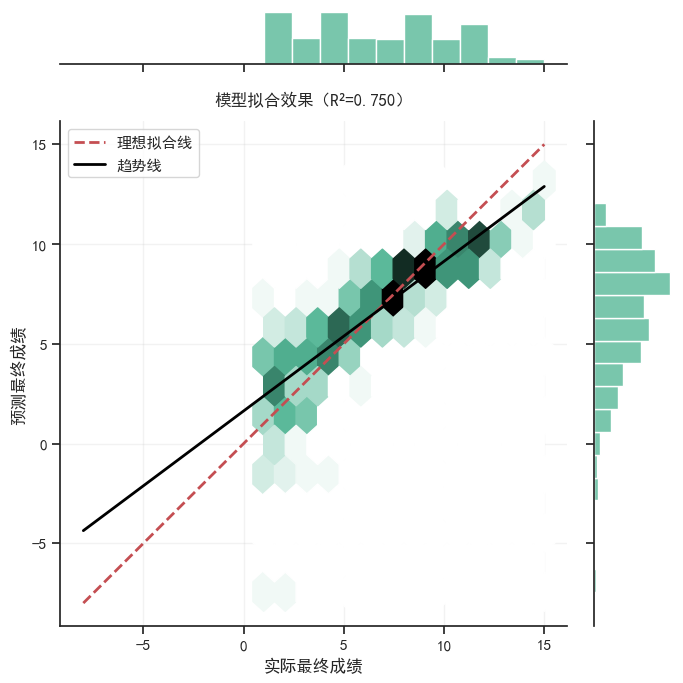

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(CSV_PATH)

x = df["actual"].to_numpy()
y = df["predicted"].to_numpy()

if "R2" in df.columns:
    R2 = float(df["R2"].iloc[0])
else:
    k, b = np.polyfit(x, y, 1)
    yhat = k * x + b
    ss_res = np.sum((y - yhat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - ss_res / ss_tot

sns.set_theme(style="ticks")
plt.rcParams["axes.unicode_minus"] = False

g = sns.jointplot(
    x=x, y=y,
    kind="hex",
    height=7,
    space=0.12
)

ax = g.ax_joint

lo = np.floor(min(x.min(), y.min()))
hi = np.ceil(max(x.max(), y.max()))
xx = np.linspace(lo, hi, 200)

ax.plot(xx, xx, "r--", lw=2, label="理想拟合线")

k, b = np.polyfit(x, y, 1)
ax.plot(xx, k * xx + b, lw=2, color="black", label="趋势线")

ax.set_xlabel("实际最终成绩")
ax.set_ylabel("预测最终成绩")
ax.set_title(f"模型拟合效果（R²={R2:.3f}）", pad=12)

ax.legend(loc="upper left", frameon=True)

ax.grid(True, alpha=0.25)
sns.despine(ax=ax)


plt.tight_layout()
plt.show()

g.fig.savefig("hexbin_actual_vs_predicted.png", dpi=300, bbox_inches="tight")


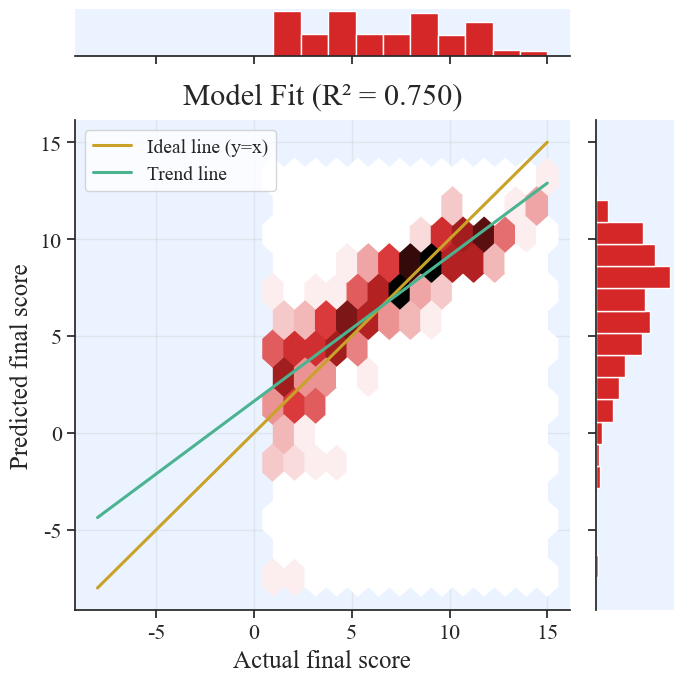

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CSV_PATH = "q3_actual_vs_predicted.csv"
df = pd.read_csv(CSV_PATH)

x = df["actual"].to_numpy()
y = df["predicted"].to_numpy()

if "R2" in df.columns:
    R2 = float(df["R2"].iloc[0])
else:
    k_, b_ = np.polyfit(x, y, 1)
    yhat = k_ * x + b_
    ss_res = np.sum((y - yhat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - ss_res / ss_tot


sns.set_theme(style="ticks")

plt.rcParams.update({
    "font.family": FONT_FAMILY,
    "axes.unicode_minus": False,

    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 14,
})

GRID_ALPHA = 0.35


g = sns.jointplot(
    x=x, y=y,
    kind="hex",
    color="#D62728",
    height=7,
    space=0.12
)

g.ax_marg_x.patches and g.ax_marg_y.patches
for p in g.ax_marg_x.patches: p.set_facecolor("#D62728")
for p in g.ax_marg_y.patches: p.set_facecolor("#D62728")


ax = g.ax_joint

ax.set_facecolor(AX_FACE)
g.ax_marg_x.set_facecolor(AX_FACE)
g.ax_marg_y.set_facecolor(AX_FACE)

ax.grid(True, alpha=GRID_ALPHA)


lo = np.floor(min(x.min(), y.min()))
hi = np.ceil(max(x.max(), y.max()))
xx = np.linspace(lo, hi, 200)

ax.plot(xx, xx, ls="-", lw=2.2, color=ideal_color, label="Ideal line (y=x)")

k, b = np.polyfit(x, y, 1)
ax.plot(xx, k * xx + b, lw=2.2, color=trend_color, label="Trend line")



ax.set_xlabel("Actual final score")
ax.set_ylabel("Predicted final score")

ax.legend(loc="upper left", frameon=True)

sns.despine(ax=ax)

plt.tight_layout()
plt.show()

g.fig.savefig("hexbin_fit_en_tnr_bluebg.png", dpi=300, bbox_inches="tight")
